In [2]:
!pip install matplotlib
!pip install pandas numpy
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Define file paths
file_paths = {
    'data1': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'data2': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'data3': r'D:\grad project\new datasetml\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'data4': r'D:\grad project\new datasetml\Monday-WorkingHours.pcap_ISCX.csv',
    'data5': r'D:\grad project\new datasetml\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'data6': r'D:\grad project\new datasetml\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'data7': r'D:\grad project\new datasetml\Tuesday-WorkingHours.pcap_ISCX.csv',
    'data8': r'D:\grad project\new datasetml\Wednesday-workingHours.pcap_ISCX.csv',
}

# Load datasets
data = {}
for key, path in file_paths.items():
    data[key] = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Create a list of datasets
data_list = [data[key] for key in file_paths]

# Print the dimensions of each dataset
print('Data dimensions: ')
for i, data in enumerate(data_list, start=1):
    rows, cols = data.shape
    print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [5]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')
     

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [6]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [7]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [8]:


data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [10]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [11]:
pd.options.display.max_columns = 80
data
     

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,16.3

In [12]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')
     

Number of duplicates: 308381


In [13]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [14]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [15]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [17]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')
     

Initial missing values: 353
Missing values after processing infinite values: 3128


In [18]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [19]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


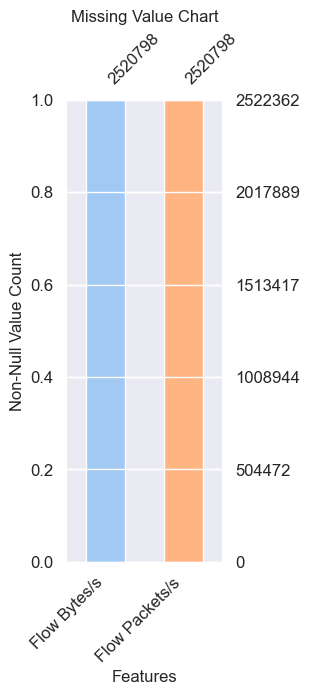

In [20]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

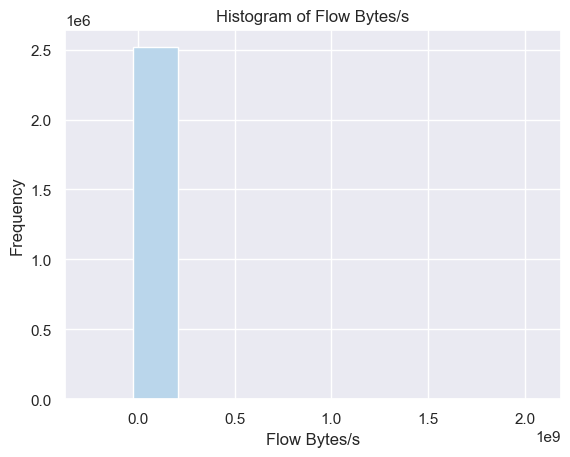

In [22]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

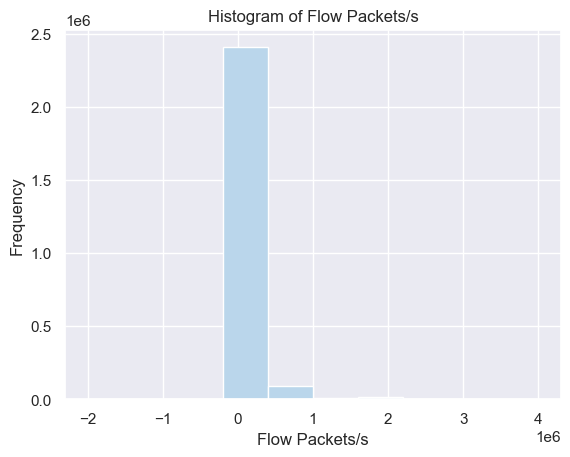

In [23]:

plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [24]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [28]:
# Fill missing values with the median
data['Flow Bytes/s'] = data['Flow Bytes/s'].fillna(med_flow_bytes)
data['Flow Packets/s'] = data['Flow Packets/s'].fillna(med_flow_packets)

# Print the number of missing values
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())


Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [29]:
data['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack ï¿½ Brute Force', 'Web Attack ï¿½ XSS',
       'Web Attack ï¿½ Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [30]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                          2096484
DoS Hulk                         172849
DDoS                             128016
PortScan                          90819
DoS GoldenEye                     10286
FTP-Patator                        5933
DoS slowloris                      5385
DoS Slowhttptest                   5228
SSH-Patator                        3219
Bot                                1953
Web Attack ï¿½ Brute Force         1470
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: count, dtype: int64

In [31]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [32]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [33]:
data.drop('Label', axis = 1, inplace = True)

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 3 7 1 6 8 2 4 5]


In [49]:
# Step 1: Replace all nan values in 'Attack Type' with a placeholder, e.g., "Web Attack"
data['Attack Type'] = data['Attack Type'].fillna("Web Attack")

# Step 2: Re-apply LabelEncoder to ensure all labels, including "Web Attack," are encoded
le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

# Step 3: Verify encoding by printing each unique encoded value with its corresponding label
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")


0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [50]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)
     

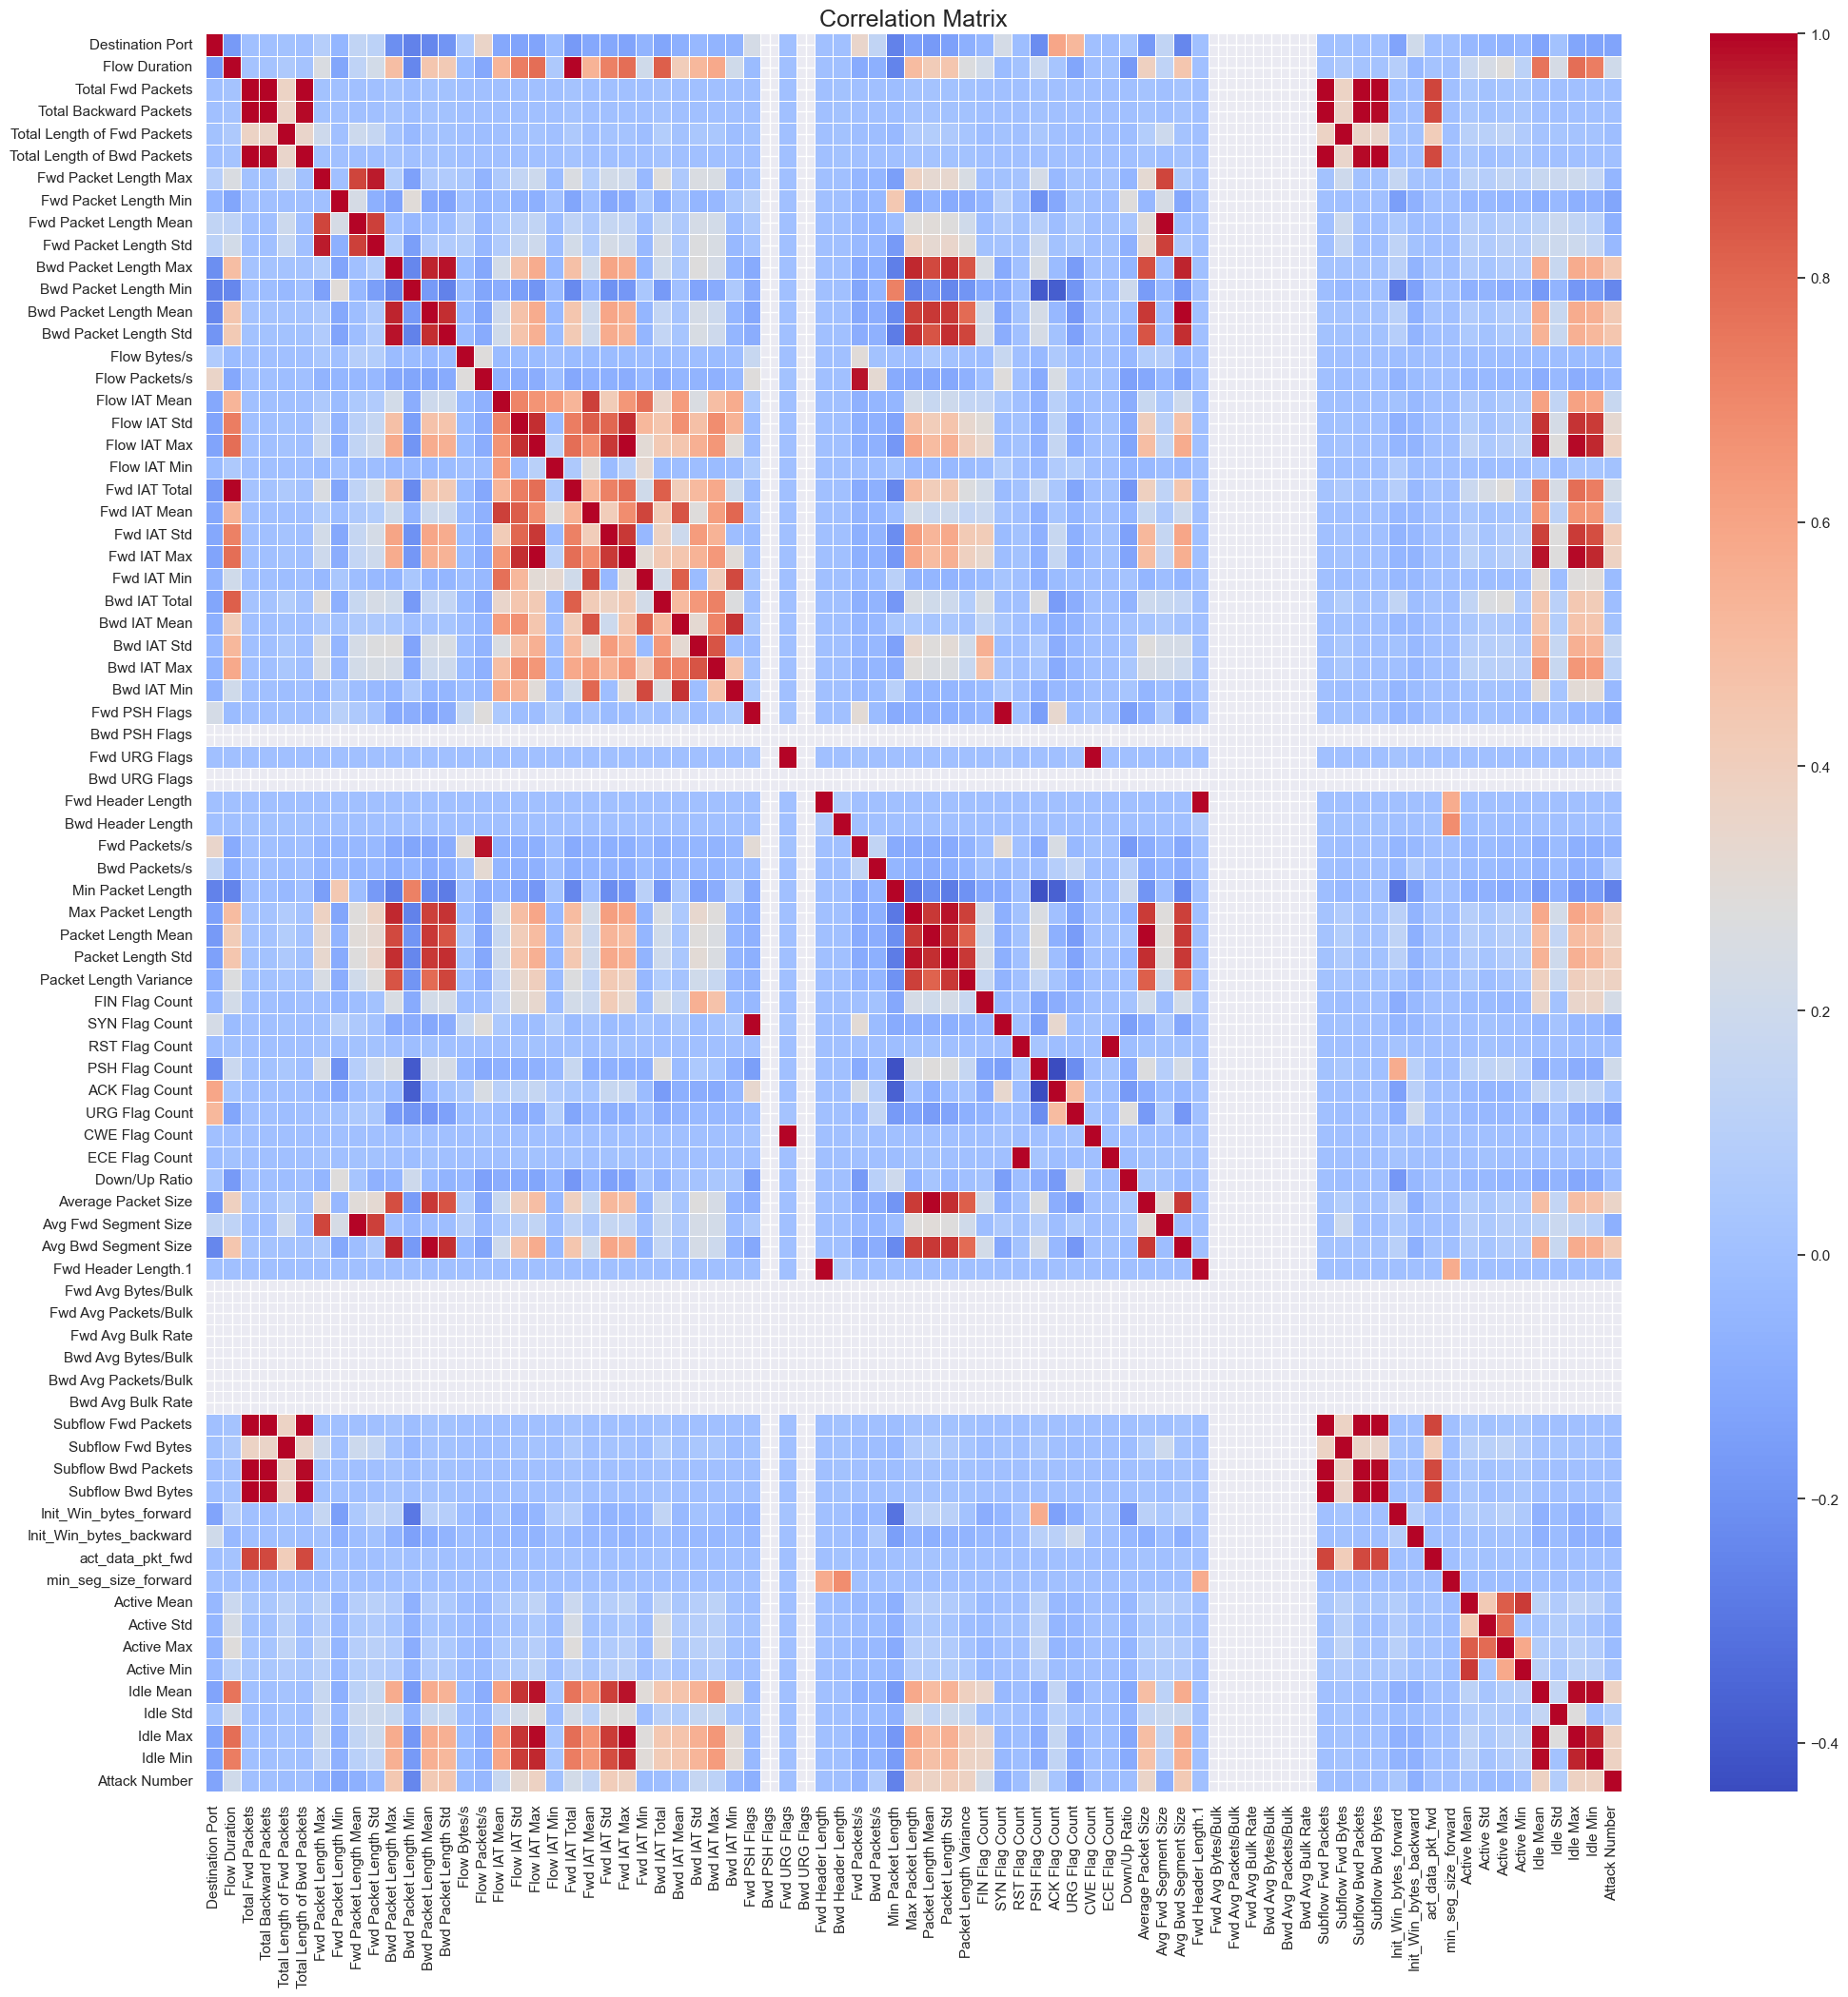

In [51]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [52]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [53]:
print(f'Number of considerable important features: {len(pos_corr_features)}')
     

Number of considerable important features: 32


In [54]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [55]:
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [69]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe().iloc[1]  # Use .iloc[1] to get the mean by position
    new = sampled_data[col].describe().iloc[1]  # Use .iloc[1] to get the mean by position
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))


Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8709.619693           0.06%
Flow Duration                   16581323.773163       16664541.182583       0.50%
Total Fwd Packets               10.276271             11.801783             14.84%
Total Backward Packets          11.565964             13.671102             18.20%
Total Length of Fwd Packets     611.575108            609.676051            0.31%
Total Length of Bwd Packets     18133.153930          22797.828210          25.72%
Fwd Packet Length Max           231.091768            233.184968            0.91%
Fwd Packet Length Min           19.194641             19.227202             0.17%
Fwd Packet Length Mean          63.470104             63.967652             0.78%
Fwd Packet Length Std 

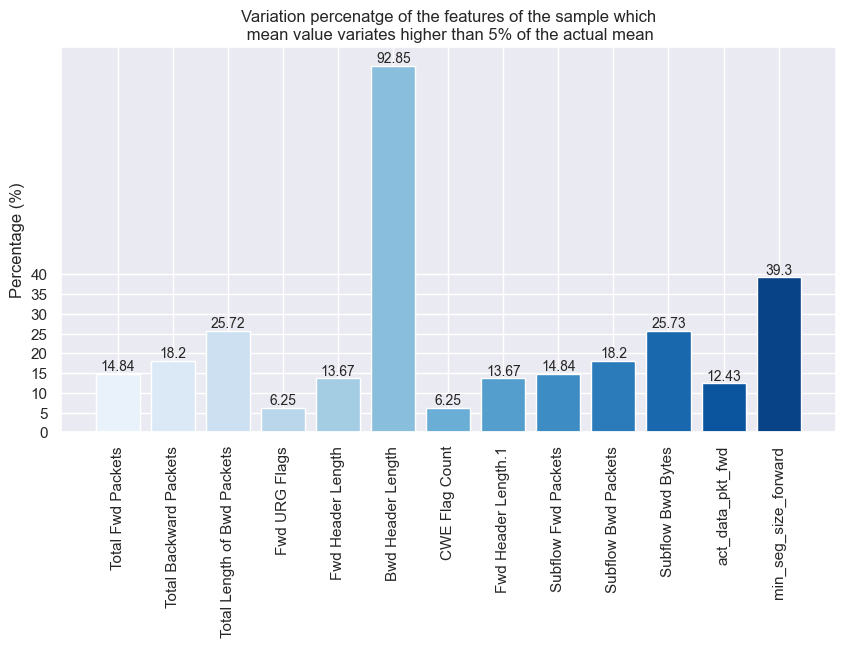

In [70]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [71]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))
     

Unique value count for: 
1.  Destination Port              : 33264
2.  Flow Duration                 : 256319
3.  Total Fwd Packets             : 683
4.  Total Backward Packets        : 838
5.  Total Length of Fwd Packets   : 9099
6.  Total Length of Bwd Packets   : 24229
7.  Fwd Packet Length Max         : 3686
8.  Fwd Packet Length Min         : 242
9.  Fwd Packet Length Mean        : 35277
10. Fwd Packet Length Std         : 66362
11. Bwd Packet Length Max         : 3888
12. Bwd Packet Length Min         : 450
13. Bwd Packet Length Mean        : 45979
14. Bwd Packet Length Std         : 62866
15. Flow Bytes/s                  : 347114
16. Flow Packets/s                : 288254
17. Flow IAT Mean                 : 274064
18. Flow IAT Std                  : 229405
19. Flow IAT Max                  : 166881
20. Flow IAT Min                  : 45911
21. Fwd IAT Total                 : 119286
22. Fwd IAT Mean                  : 164137
23. Fwd IAT Std                   : 148396
24. Fwd IAT

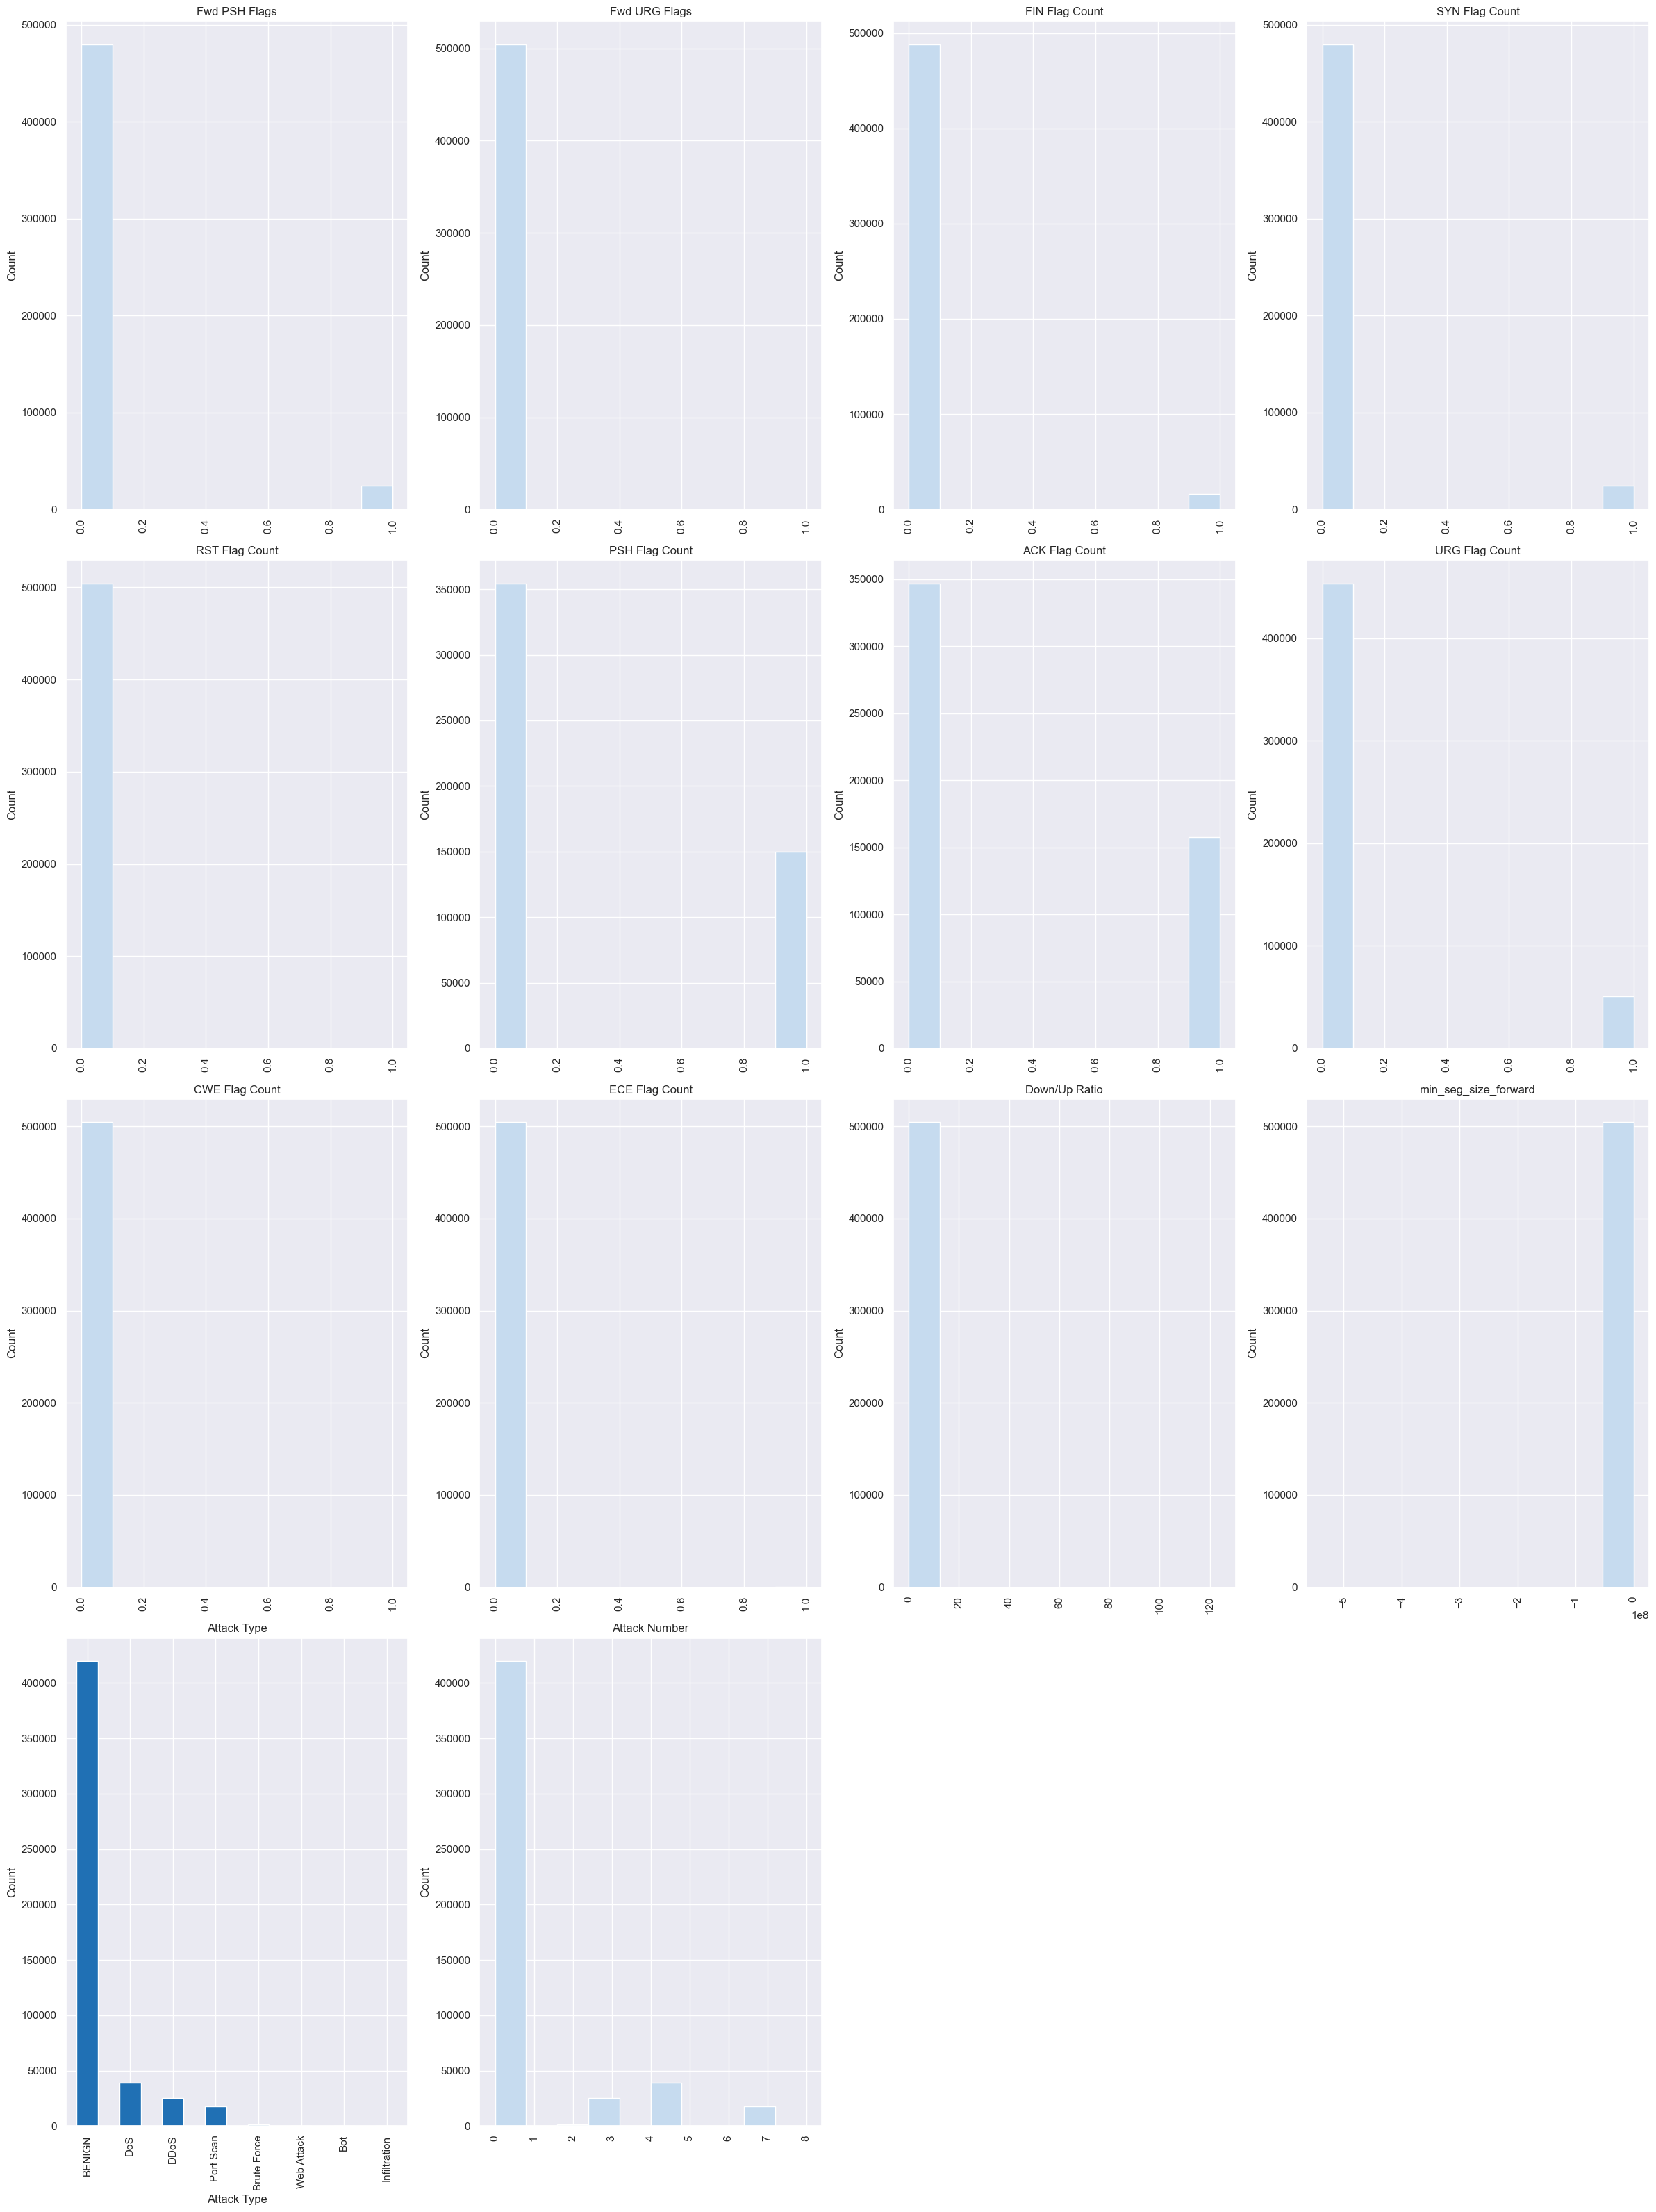

In [72]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [73]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)
     

In [80]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [81]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109264               21.66
Flow Duration                        94059               18.65
Total Fwd Packets                    50548               10.02
Total Backward Packets               47917                9.50
Total Length of Fwd Packets          62997               12.49
Total Length of Bwd Packets         114946               22.79
Fwd Packet Length Max                48745                9.66
Fwd Packet Length Min                 2611                0.52
Fwd Packet Length Mean               35787                7.09
Fwd Packet Length Std                47276                9.37
Bwd Packet Length Max                75002               14.87
Bwd Packet Length Min                13507                2.68
Bwd Packet Length Mean               87556               17.36
Bwd Packet Length Std                89801               17.80
Flow Bytes/s                         95014             

In [82]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 93837 (22.36%)
- DoS: 0 (0.00%)
- DDoS: 0 (0.00%)
- Port Scan: 2209 (12.25%)
- Brute Force: 0 (0.00%)
- Bot: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Infiltration: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97520 (23.24%)
- DoS: 8490 (21.85%)
- DDoS: 4318 (17.01%)
- Port Scan: 389 (2.16%)
- Brute Force: 426 (24.41%)
- Bot: 86 (22.57%)
- Web Attack: 60 (14.32%)
- Infiltration: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 78213 (18.64%)
- DoS: 489 (1.26%)
- DDoS: 816 (3.21%)
- Port Scan: 280 (1.55%)
- Brute Force: 0 (0.00%)
- Bot: 8 (2.10%)
- Web Attack: 60 (14.32%)
- Infiltration: 1 (10.00%)

Feature: Total Backward Packets
- BENIGN: 60289 (14.37%)
- DoS: 4517 (11.62%)
- DDoS: 0 (0.00%)
- Port Scan: 97 (0.54%)
- Brute Force: 0 (0.00%)
- Bot: 8 (2.10%)
- Web Attack: 37 (8.83%)
- Infiltration: 1 (10.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80572 (19.20%)
- DoS: 10164 (26.16%)
- DDoS: 4610 (18.16%)
- Port Scan: 118 (0.65%)
- Brute Force: 0 (0.

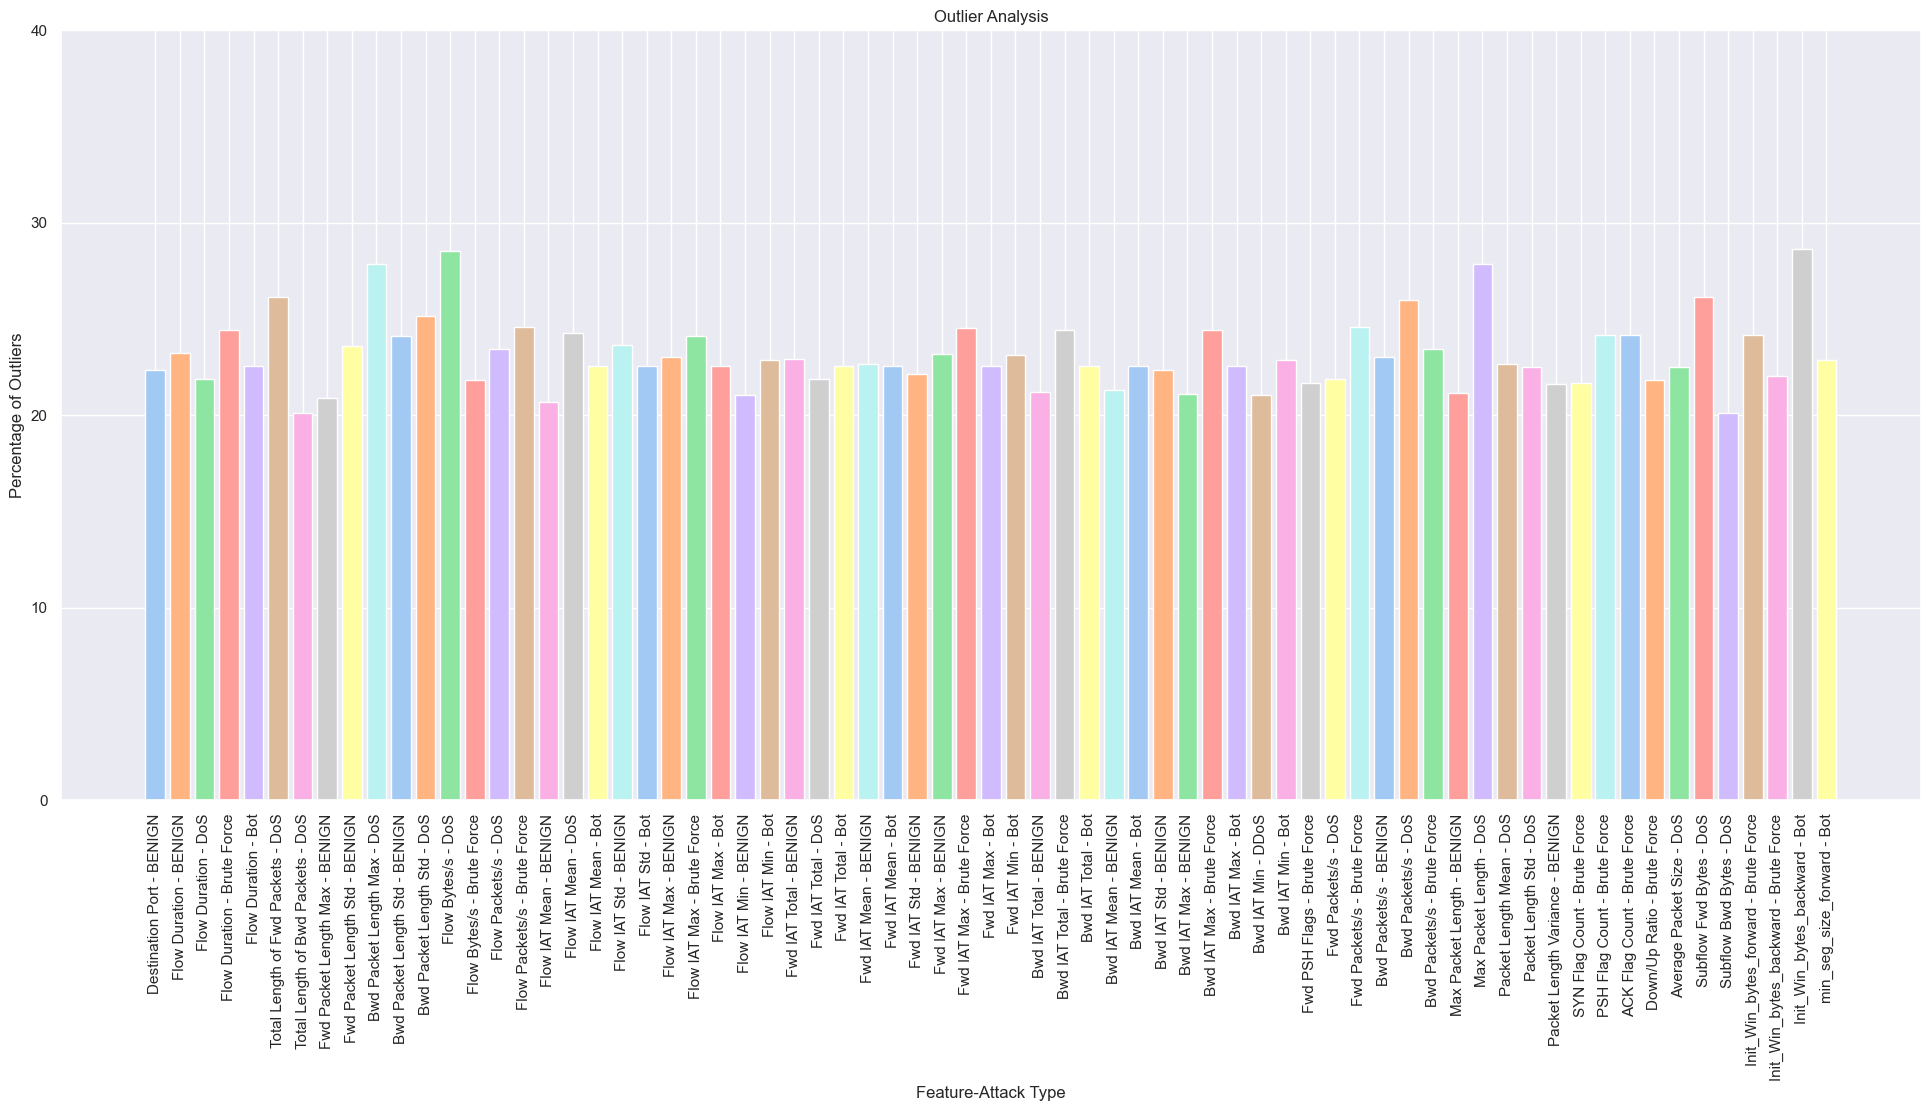

In [83]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

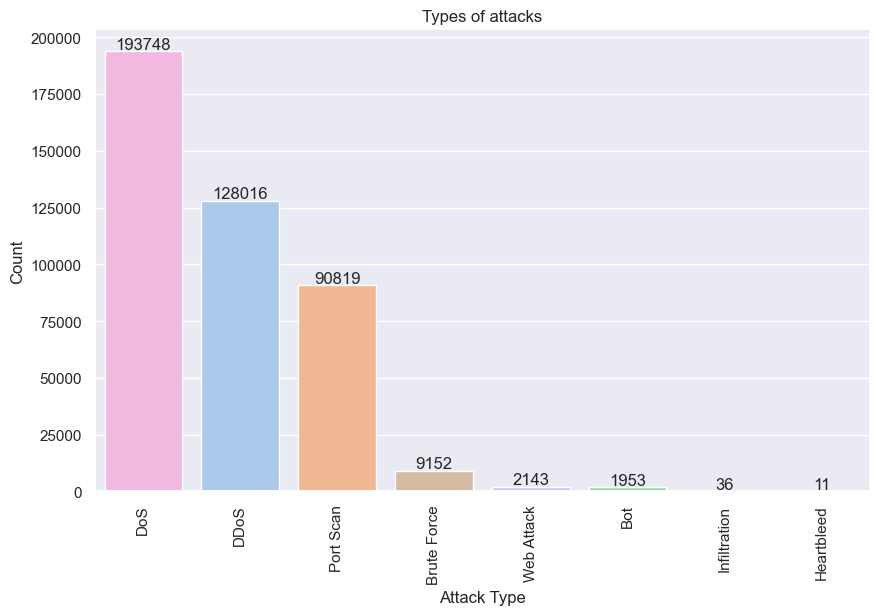

In [85]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Attack Type', hue='Attack Type', data=attacks, palette='pastel', order=attacks['Attack Type'].value_counts().index, legend=False)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha='center')

plt.show()


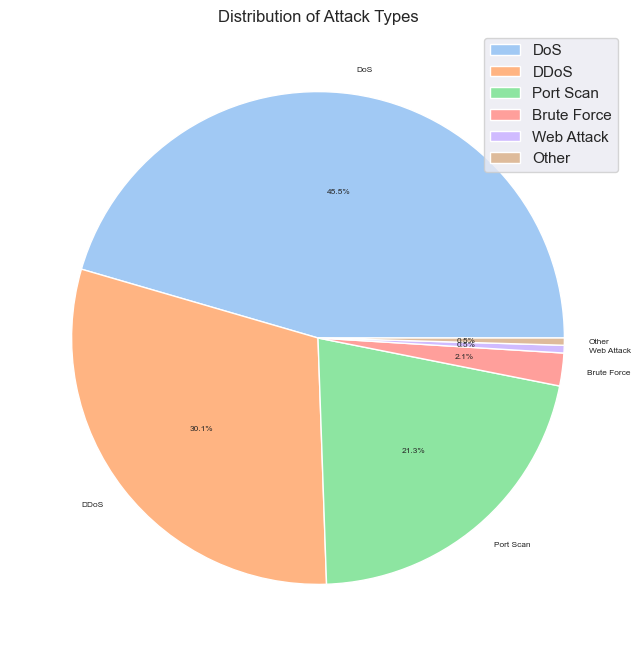

In [86]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [88]:
data.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000e+00,0.000000e+00,3,3,3,3.000000e+00,0.000000e+00,3,3,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882,124,5216127,2.608064e+06,3.686598e+06,5214882,1245,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,3525,0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173,112,218783,3.125471e+04,3.068629e+04,78311,219,5169833,1.033967e+06,2.218975e+06,5002421,840,0,0,0,0,172,132,1.547402,1.160551,0,3525,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984,0,119000000,4.444951e+04,2.224617e+05,5025702,0,119000000,6.904091e+04,2.738674e+05,5024984,1,0,0,0,0,85928,55336,22.505772,14.492544,0,17376,1713.525708,2669.389319,7.125639e+06,0,0,0,1,0,0,0,0,0,1713.913910,3.090875,4370.686524,85928,0,0,0,0,0,0,2685,8299,1729,7556917,29200,235,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000,

In [89]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [90]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')
     

Reduced memory usage: 47.50%


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow I

In [92]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-1.300000e+01,208.000000,50577.000000,5.329717e+06,1.200000e+08
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Total Length of Bwd Packets,2522362.0,1.813315e+04,2.397434e+06,0.000000e+00,6.000000,155.000000,9.880000e+02,6.554530e+08
Fwd Packet Length Max,2522362.0,2.310918e+02,7.561625e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd Packet Length Min,2522362.0,1.919464e+01,6.079447e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2522362.0,6.347011e+01,1.955015e+02,0.000000e+00,6.000000,36.111111,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2522362.0,7.727760e+01,2.967953e+02,0.000000e+00,0.000000,0.000000,7.413914e+01,7.125597e+03


In [93]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols
     

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [94]:

data.shape

(2522362, 71)

In [95]:

# Columns after removing non variant columns
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [96]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
     

In [97]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')
     

information retained: 99.23%


In [98]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [99]:

new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.311094,-0.052684,0.515875,0.616537,3.840727,0.395336,-0.017878,0.186557,0.370079,-0.680438,-0.340149,-0.266433,1.635278,0.665315,-1.895494,-0.138855,-0.005556,0.453169,-0.814374,-0.486573,-0.470138,-0.004641,-2.130732,0.145377,-0.163093,-0.050706,-0.233945,0.699887,-0.539784,-0.035279,0.023075,0.001733,0.045647,0.151301,0.051935,BENIGN
1,-2.246553,-0.049159,0.467881,0.395550,2.001551,-0.141045,-0.016487,-0.780967,-0.889976,2.660582,0.411741,0.404896,0.836641,-0.101931,0.925867,-0.062942,0.000003,0.298871,-0.367053,-0.375623,-0.398645,-1.073630,-0.327282,-0.254919,-0.287932,0.715411,-0.012903,0.543839,0.785574,0.212940,0.030939,0.001218,0.025860,0.009198,-0.058324,BENIGN
2,-2.258822,-0.049501,0.473634,0.408672,2.081408,-0.132962,-0.016754,-0.769681,-0.877466,2.634068,0.401435,0.393491,0.968392,-0.073518,0.854770,-0.005022,0.007445,0.348229,-0.289745,-0.245034,-0.442864,-0.999573,-0.217613,-0.276038,-0.326148,0.735272,-0.020362,0.539934,0.780933,0.203564,0.034717,0.001194,0.025898,0.005914,-0.064384,BENIGN
3,-2.249188,-0.050635,0.467051,0.346824,2.013841,-0.106530,-0.016178,-0.745133,-0.840229,2.506786,0.378657,0.371421,1.016718,-0.034708,0.735186,0.071080,0.016595,0.390537,-0.181640,-0.073434,-0.473776,-0.925454,-0.015574,-0.265095,-0.347247,0.700953,-0.027380,0.175826,0.802770,0.063856,0.047573,0.001131,0.009281,0.018965,-0.033301,BENIGN
4,-2.311090,-0.052685,0.515877,0.616515,3.840698,0.395327,-0.017879,0.186543,0.370100,-0.680454,-0.340152,-0.266433,1.635264,0.665320,-1.895503,-0.138857,-0.005556,0.453173,-0.814384,-0.486570,-0.470143,-0.004637,-2.130707,0.145360,-0.163099,-0.050762,-0.233960,0.699809,-0.539762,-0.035319,0.023078,0.001733,0.045645,0.151311,0.051946,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-1.966993,-0.034823,0.214152,-0.550069,-0.715274,-0.255957,-0.028814,-0.395631,0.253441,-0.399620,-0.075822,-0.017902,-0.581193,0.159172,-0.569453,-0.258389,-0.029447,-0.107606,-0.505889,-0.163024,-0.097383,0.299323,0.060292,-0.058730,-0.597401,0.068725,-0.296905,-0.081193,0.269844,-0.117746,-0.025322,-0.000129,0.121039,-0.385284,-0.365042,BENIGN
2522358,-1.967205,-0.034920,0.140546,-0.769750,-1.329699,-1.050008,-0.084008,-0.676149,1.052839,-0.349890,-0.071681,0.034673,0.023709,0.084573,-0.236005,0.090453,0.018276,0.217992,-0.059812,-0.013755,0.113308,0.177115,0.130656,-0.438373,0.350816,0.365842,0.177611,0.145811,0.015451,-0.222039,-0.507178,-0.003223,0.002393,-0.005697,-0.005829,BENIGN
2522359,-2.177556,-0.044307,0.882352,1.291548,4.455997,0.141248,-0.035232,0.677099,1.469905,-0.910787,-0.146735,-0.035853,-2.571259,-0.823715,3.071331,-0.947479,-0.131738,-1.099300,-0.254745,0.688442,-0.640662,0.771187,0.919094,-0.600840,0.010523,0.148825,-0.031176,1.551953,-0.121564,0.613116,0.076038,0.000554,0.116441,-0.021843,-0.250166,BENIGN
2522360,-1.906970,-0.035866,0.236786,-0.648835,-0.915041,-0.480387,-0.047541,-0.496969,0.535691,-0.471521,-0.094094,-0.003074,-0.595404,0.180017,-0.620484,-0.236342,-0.024442,-0.003136,-0.465742,-0.176056,-0.010992,0.414358,0.039426,-0.250487,-0.467611,0.375742,-0.168155,0.066397,0.364400,-0.251553,-0.355645,-0.001837,0.073125,-0.243405,-0.267952,BENIGN


In [ ]:
#end of preprocessing 

In [14]:

# Required Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
!pip install xgboost
!pip install matplotlib
!pip install pandas numpy
!pip install seaborn

In [5]:
import pandas as pd

# Define file paths
file_paths = {
    'data1': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'data2': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'data3': r'D:\grad project\new datasetml\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'data4': r'D:\grad project\new datasetml\Monday-WorkingHours.pcap_ISCX.csv',
    'data5': r'D:\grad project\new datasetml\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'data6': r'D:\grad project\new datasetml\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'data7': r'D:\grad project\new datasetml\Tuesday-WorkingHours.pcap_ISCX.csv',
    'data8': r'D:\grad project\new datasetml\Wednesday-workingHours.pcap_ISCX.csv',
}

# Load datasets
data = {}
for key, path in file_paths.items():
    data[key] = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Create a list of datasets
data_list = [data[key] for key in file_paths]

# Print the dimensions of each dataset
print('Data dimensions: ')
for i, data in enumerate(data_list, start=1):
    rows, cols = data.shape
    print(f'Data{i} -> {rows} rows, {cols} columns')


# Example: Selecting the first dataset for demonstration
df = data_list[0]  # Replace 0 with the index of the dataset you want to use



Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [6]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [7]:
print(df[' Label'].unique())


['BENIGN' 'DDoS']


In [ ]:
#This code preprocesses a dataset by
handling missing (NaN) and infinite (Inf) values, 
splits the data into training and testing sets, 
and trains a Random Forest classifier on the training data.
It then evaluates the importance of each feature in the model, ranks them
and displays the top 10 most important features. 
The goal is to identify which features contribute the most to the model's predictions.


In [9]:

# Define features (X) and target (y)
target_column = ' Label'  # Note the leading space
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle NaN and Inf values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace Inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means

# Check if all NaN and Inf are handled
print("NaN values after preprocessing:", X.isnull().sum().sum())
print("Infinite values after preprocessing:", np.isinf(X).sum().sum())

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

# Display top features
top_features = [(feature_names[i], importances[i]) for i in sorted_indices[:10]]
print('Top 10 important features:', top_features)


NaN values after preprocessing: 0
Infinite values after preprocessing: 0
Top 10 important features: [(' Fwd Packet Length Max', np.float64(0.08730608231524072)), ('Init_Win_bytes_forward', np.float64(0.07634889724577786)), (' Fwd Packet Length Mean', np.float64(0.06934450341631909)), (' Subflow Fwd Bytes', np.float64(0.06432974444200451)), ('Subflow Fwd Packets', np.float64(0.05729330855343489)), (' Avg Fwd Segment Size', np.float64(0.056909739055675784)), ('Total Length of Fwd Packets', np.float64(0.05598748907590674)), (' Bwd Packet Length Min', np.float64(0.047965661238302607)), (' act_data_pkt_fwd', np.float64(0.04081865131790982)), (' Destination Port', np.float64(0.037602293491638634))]


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [19]:
from sklearn.linear_model import LogisticRegression

# Correct instantiation of the LogisticRegression model

LogisticRegression(max_iter=5000)


LogisticRegression(max_iter=5000)

In [18]:
LogisticRegression(max_iter=1000, solver='saga')


LogisticRegression(max_iter=1000, solver='saga')

In [2]:
import pandas as pd
file_paths = {
    'data1': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'data2': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'data3': r'D:\grad project\new datasetml\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'data4': r'D:\grad project\new datasetml\Monday-WorkingHours.pcap_ISCX.csv',
    'data5': r'D:\grad project\new datasetml\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'data6': r'D:\grad project\new datasetml\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'data7': r'D:\grad project\new datasetml\Tuesday-WorkingHours.pcap_ISCX.csv',
    'data8': r'D:\grad project\new datasetml\Wednesday-workingHours.pcap_ISCX.csv',
}
# Load datasets
data = {}
for key, path in file_paths.items():
    data[key] = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Create a list of datasets
data_list = [data[key] for key in file_paths]

# Example: Selecting the first dataset for demonstration
df = data_list[0]  # Replace 0 with the index of the dataset you want to use
# Print the dimensions of each dataset
print('Data dimensions: ')
for i, data in enumerate(data_list, start=1):
    rows, cols = data.shape
    print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [ ]:
#Random Forest

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
target_column = ' Label'  # Note the leading space
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle NaN and Inf values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace Inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means

# Check if all NaN and Inf are handled
print("NaN values after preprocessing:", X.isnull().sum().sum())
print("Infinite values after preprocessing:", np.isinf(X).sum().sum())

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

# Display top features
top_features = [(feature_names[i], importances[i]) for i in sorted_indices[:50]]
print('Top 50 important features from Random Forest:', top_features)


NaN values after preprocessing: 0
Infinite values after preprocessing: 0
Top 50 important features from Random Forest: [(' Fwd Packet Length Max', np.float64(0.08730608231524072)), ('Init_Win_bytes_forward', np.float64(0.07634889724577786)), (' Fwd Packet Length Mean', np.float64(0.06934450341631909)), (' Subflow Fwd Bytes', np.float64(0.06432974444200451)), ('Subflow Fwd Packets', np.float64(0.05729330855343489)), (' Avg Fwd Segment Size', np.float64(0.056909739055675784)), ('Total Length of Fwd Packets', np.float64(0.05598748907590674)), (' Bwd Packet Length Min', np.float64(0.047965661238302607)), (' act_data_pkt_fwd', np.float64(0.04081865131790982)), (' Destination Port', np.float64(0.037602293491638634)), (' Fwd IAT Std', np.float64(0.034797996293999496)), (' Fwd IAT Max', np.float64(0.03229849083326978)), (' Fwd IAT Mean', np.float64(0.029463715254120594)), (' Fwd Packet Length Std', np.float64(0.02756679775194849)), ('Fwd IAT Total', np.float64(0.02747592596196278)), (' Fwd Hea

In [ ]:
#RFE

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

file_paths = {
    'data1': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'data2': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'data3': r'D:\grad project\new datasetml\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'data4': r'D:\grad project\new datasetml\Monday-WorkingHours.pcap_ISCX.csv',
    'data5': r'D:\grad project\new datasetml\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'data6': r'D:\grad project\new datasetml\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'data7': r'D:\grad project\new datasetml\Tuesday-WorkingHours.pcap_ISCX.csv',
    'data8': r'D:\grad project\new datasetml\Wednesday-workingHours.pcap_ISCX.csv',
}

# Load datasets
data = {}
for key, path in file_paths.items():
    data[key] = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Select a dataset to work with (e.g., the first dataset)
df = data['data1']

# Define features (X) and target (y)
target_column = ' Label'  # Ensure that ' Label' matches the actual column name with a leading space
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle NaN and Inf values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace Inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means

# Check if all NaN and Inf are handled
print("NaN values after preprocessing:", X.isnull().sum().sum())
print("Infinite values after preprocessing:", np.isinf(X).sum().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the feature matrix

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression as the estimator for RFE with increased max_iter
estimator = LogisticRegression(max_iter=1000)

# Initialize RFE with the estimator, specifying the number of features to select
selector = RFE(estimator, n_features_to_select=50, step=1)

# Fit RFE to the training data
selector.fit(X_train, y_train)

# Get the ranking of features
ranking = selector.ranking_

# Get the top features (those with ranking 1)
top_features = [(X.columns[i], ranking[i]) for i in range(len(ranking)) if ranking[i] == 1]

print('Top 50 important features from RFE:', top_features)


NaN values after preprocessing: 0
Infinite values after preprocessing: 0
Top 50 important features from RFE: [(' Destination Port', np.int64(1)), (' Flow Duration', np.int64(1)), (' Total Fwd Packets', np.int64(1)), (' Total Backward Packets', np.int64(1)), ('Total Length of Fwd Packets', np.int64(1)), (' Total Length of Bwd Packets', np.int64(1)), (' Fwd Packet Length Max', np.int64(1)), (' Fwd Packet Length Mean', np.int64(1)), (' Fwd Packet Length Std', np.int64(1)), (' Bwd Packet Length Std', np.int64(1)), (' Flow Packets/s', np.int64(1)), (' Flow IAT Mean', np.int64(1)), (' Flow IAT Std', np.int64(1)), (' Flow IAT Max', np.int64(1)), ('Fwd IAT Total', np.int64(1)), (' Fwd IAT Mean', np.int64(1)), (' Fwd IAT Std', np.int64(1)), (' Fwd IAT Max', np.int64(1)), (' Fwd IAT Min', np.int64(1)), (' Bwd IAT Mean', np.int64(1)), (' Bwd IAT Std', np.int64(1)), (' Bwd IAT Min', np.int64(1)), ('Fwd PSH Flags', np.int64(1)), (' Fwd Header Length', np.int64(1)), (' Bwd Header Length', np.int64(1

In [ ]:
#XGBoost 

In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

file_paths = {
    'data1': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'data2': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'data3': r'D:\grad project\new datasetml\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'data4': r'D:\grad project\new datasetml\Monday-WorkingHours.pcap_ISCX.csv',
    'data5': r'D:\grad project\new datasetml\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'data6': r'D:\grad project\new datasetml\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'data7': r'D:\grad project\new datasetml\Tuesday-WorkingHours.pcap_ISCX.csv',
    'data8': r'D:\grad project\new datasetml\Wednesday-workingHours.pcap_ISCX.csv',
}

# Load datasets
data = {}
for key, path in file_paths.items():
    data[key] = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Select a dataset to work with (e.g., the first dataset)
df = data['data1']

# Define features (X) and target (y)
target_column = ' Label'  # Ensure that ' Label' matches the actual column name with a leading space
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle NaN and Inf values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace Inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means

# Check if all NaN and Inf are handled
print("NaN values after preprocessing:", X.isnull().sum().sum())
print("Infinite values after preprocessing:", np.isinf(X).sum().sum())

# Encode the target labels (e.g., 'BENIGN' -> 0, 'DDoS' -> 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost as the classifier
model = XGBClassifier(eval_metric='mlogloss')  # No need for use_label_encoder=False


# Fit the model
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = importances.argsort()[::-1]

# Display the top features
top_features = [(X.columns[i], importances[i]) for i in sorted_indices[:50]]

print('Top 50 important features using XGBoost:', top_features)


NaN values after preprocessing: 0
Infinite values after preprocessing: 0
Top 50 important features using XGBoost: [(' Fwd Packet Length Mean', np.float32(0.6716692)), ('Total Length of Fwd Packets', np.float32(0.30768192)), (' Bwd Packet Length Mean', np.float32(0.0032683474)), (' URG Flag Count', np.float32(0.0022302987)), (' Fwd Packet Length Max', np.float32(0.0019873364)), (' Bwd Header Length', np.float32(0.0018381043)), (' Fwd Packet Length Std', np.float32(0.0018130229)), (' Destination Port', np.float32(0.0016480028)), (' Bwd Packet Length Min', np.float32(0.0013060365)), ('FIN Flag Count', np.float32(0.00079739053)), (' Packet Length Std', np.float32(0.00076046435)), ('Bwd IAT Total', np.float32(0.00066014426)), ('Init_Win_bytes_forward', np.float32(0.00042074663)), (' Bwd Packet Length Std', np.float32(0.00038991182)), (' Idle Min', np.float32(0.00038937427)), (' Bwd Packets/s', np.float32(0.00037080405)), (' Init_Win_bytes_backward', np.float32(0.00035310374)), ('Bwd Packet 

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# File paths
file_paths = {
    'data1': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'data2': r'D:\grad project\new datasetml\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'data3': r'D:\grad project\new datasetml\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'data4': r'D:\grad project\new datasetml\Monday-WorkingHours.pcap_ISCX.csv',
    'data5': r'D:\grad project\new datasetml\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'data6': r'D:\grad project\new datasetml\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'data7': r'D:\grad project\new datasetml\Tuesday-WorkingHours.pcap_ISCX.csv',
    'data8': r'D:\grad project\new datasetml\Wednesday-workingHours.pcap_ISCX.csv',
}

# Load datasets
data = {}
for key, path in file_paths.items():
    data[key] = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Select a dataset to work with (e.g., the first dataset)
df = data['data1']

# Define features (X) and target (y)
target_column = ' Label'  # Ensure that ' Label' matches the actual column name with a leading space
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle NaN and Inf values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace Inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means

# Check if all NaN and Inf are handled
print("NaN values after preprocessing:", X.isnull().sum().sum())
print("Infinite values after preprocessing:", np.isinf(X).sum().sum())

# ====================
# Encode the target labels
# ====================
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode target labels (e.g., 'BENIGN' -> 0, 'DDoS' -> 1)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ====================
# 1. Random Forest
# ====================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance for Random Forest
importances_rf = rf_model.feature_importances_
feature_names_rf = X.columns
sorted_indices_rf = importances_rf.argsort()[::-1]

# Get the top 50 important features from Random Forest
top_features_rf = [feature_names_rf[i] for i in sorted_indices_rf[:50]]

# ====================
# 2. RFE with Logistic Regression
# ====================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression as the estimator for RFE
estimator = LogisticRegression(max_iter=1000)

# Initialize RFE with the estimator, specifying the number of features to select
selector = RFE(estimator, n_features_to_select=50, step=1)

# Fit RFE to the training data
selector.fit(X_scaled, y)

# Get the ranking of features for RFE
ranking_rfe = selector.ranking_

# Get the top 50 important features from RFE
top_features_rfe = [X.columns[i] for i in range(len(ranking_rfe)) if ranking_rfe[i] == 1]

# ====================
# 3. XGBoost
# ====================
# Initialize XGBoost as the classifier
model_xgb = XGBClassifier(eval_metric='mlogloss')

# Fit the model
model_xgb.fit(X_train, y_train)

# Get feature importance for XGBoost
importances_xgb = model_xgb.feature_importances_

# Sort the features by importance for XGBoost
sorted_indices_xgb = importances_xgb.argsort()[::-1]

# Get the top 50 important features from XGBoost
top_features_xgb = [X.columns[i] for i in sorted_indices_xgb[:50]]

# ====================
# Find Common Features
# ====================
# Convert the top features lists to sets
rf_set = set(top_features_rf)
rfe_set = set(top_features_rfe)
xgb_set = set(top_features_xgb)

# Find the intersection (common features)
common_features = rf_set.intersection(rfe_set).intersection(xgb_set)

# Print the common features
print("Common features between Random Forest, RFE, and XGBoost:", common_features)


NaN values after preprocessing: 0
Infinite values after preprocessing: 0
Common features between Random Forest, RFE, and XGBoost: {' Subflow Bwd Packets', ' Flow IAT Min', ' URG Flag Count', ' Flow IAT Mean', ' Packet Length Std', ' Fwd IAT Max', 'Init_Win_bytes_forward', ' Fwd Packet Length Std', ' Bwd Header Length', ' Bwd Packet Length Std', ' Bwd Packet Length Mean', 'Fwd Packets/s', ' Bwd IAT Std', ' Fwd IAT Min', ' min_seg_size_forward', ' Flow Duration', ' Fwd Packet Length Mean', ' Fwd IAT Mean', ' Total Backward Packets', ' Bwd IAT Mean', ' Destination Port', ' Subflow Bwd Bytes', ' Flow IAT Max', ' Total Length of Bwd Packets', ' Average Packet Size', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' act_data_pkt_fwd', ' Flow IAT Std', 'Fwd IAT Total', ' Init_Win_bytes_backward', ' Fwd IAT Std'}
